Self_attention을 간략히 구성해봅시다

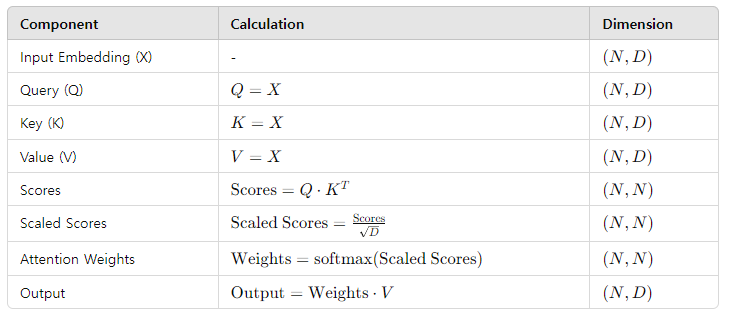

In [5]:
import numpy as np
import torch
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
def self_attention(X):
    # Convert numpy array to torch tensor
    X = torch.tensor(X, dtype=torch.float32)

    # X is used as Query, Key, and Value
    Q = X
    K = X
    V = X

    # Step 1: Dot Products of the Query with all Keys
    scores = torch.matmul(Q, K.T)

    # Step 2: Scale
    scale = np.sqrt(K.shape[-1])
    scores = scores / scale

    # Step 3: Softmax
    weights = F.softmax(scores, dim=-1)

    # Step 4: Weighted Sum
    output = torch.matmul(weights, V)
    return output.detach().numpy(), weights.detach().numpy()

임베딩을 넣어봅시다

In [7]:


# Example data (word embeddings for "I", "am", "a", "student", "and", "I", "study")
word_embeddings = {
    "I": [1, 0, 1],
    "am": [0, 1, 0],
    "a": [1, 1, 0],
    "student": [1, 0.2, 0.8],
    "and": [0, 1, 1],
    "study": [0.5, 0.5, 1]
}

# Convert words to embedding matrix
sentence = ["I", "am", "a", "student", "and", "I", "study"]
X = np.array([word_embeddings[word] for word in sentence])

output, weights = self_attention(X)



In [15]:
X.shape

(7, 3)

In [16]:
weights.shape

(3, 7, 7)

In [17]:
output.shape

(7, 3)

In [9]:
print(weights)
print(output)

[[0.19692317 0.06206071 0.11054949 0.17544815 0.11054949 0.19692317
  0.1475458 ]
 [0.10203046 0.18174809 0.18174809 0.11451907 0.18174809 0.10203046
  0.13617577]
 [0.12652281 0.12652281 0.22537662 0.14200933 0.12652281 0.12652281
  0.12652281]
 [0.18311013 0.07269898 0.12949958 0.17085338 0.11537729 0.18311013
  0.14535046]
 [0.12321385 0.12321385 0.12321385 0.12321385 0.21948233 0.12321385
  0.16444838]
 [0.19692317 0.06206071 0.11054949 0.17544815 0.11054949 0.19692317
  0.1475458 ]
 [0.15988387 0.08975624 0.11979388 0.1509144  0.15988387 0.15988387
  0.15988387]]
[[0.75361687 0.39202225 0.79230016]
 [0.56841594 0.63623595 0.6136    ]
 [0.683693   0.5700855  0.6196987 ]
 [0.73924845 0.42442176 0.76363075]
 [0.57507956 0.57277703 0.7289295 ]
 [0.75361687 0.39202225 0.79230016]
 [0.67041796 0.4795588  0.760267  ]]


시각화해봅시다

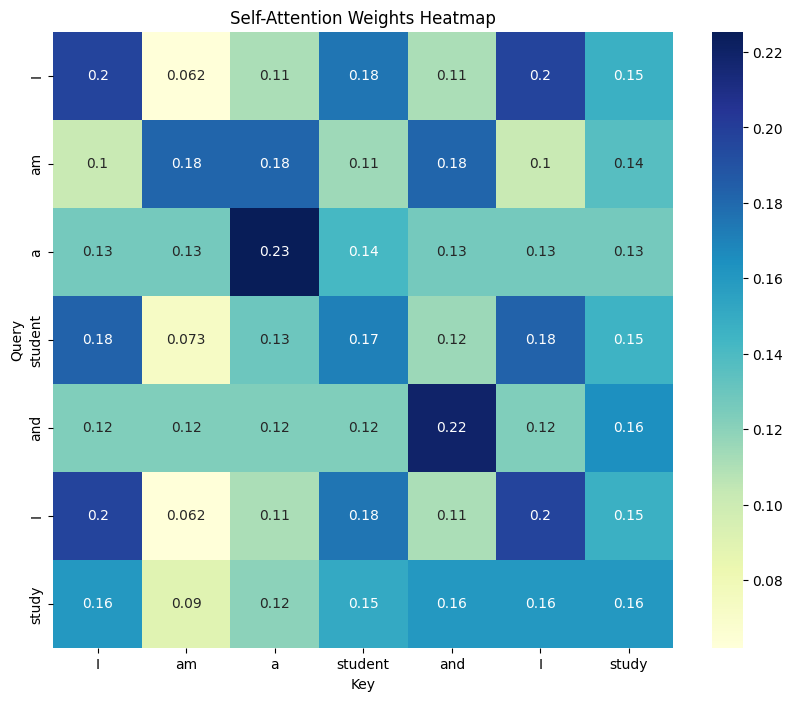

Words in the sentence: ['I', 'am', 'a', 'student', 'and', 'I', 'study']
Self-Attention output:
 [[0.75361687 0.39202225 0.79230016]
 [0.56841594 0.63623595 0.6136    ]
 [0.683693   0.5700855  0.6196987 ]
 [0.73924845 0.42442176 0.76363075]
 [0.57507956 0.57277703 0.7289295 ]
 [0.75361687 0.39202225 0.79230016]
 [0.67041796 0.4795588  0.760267  ]]


In [10]:
# Visualize weights as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(weights, xticklabels=sentence, yticklabels=sentence, annot=True, cmap="YlGnBu")
plt.title("Self-Attention Weights Heatmap")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()

print("Words in the sentence:", sentence)
print("Self-Attention output:\n", output)

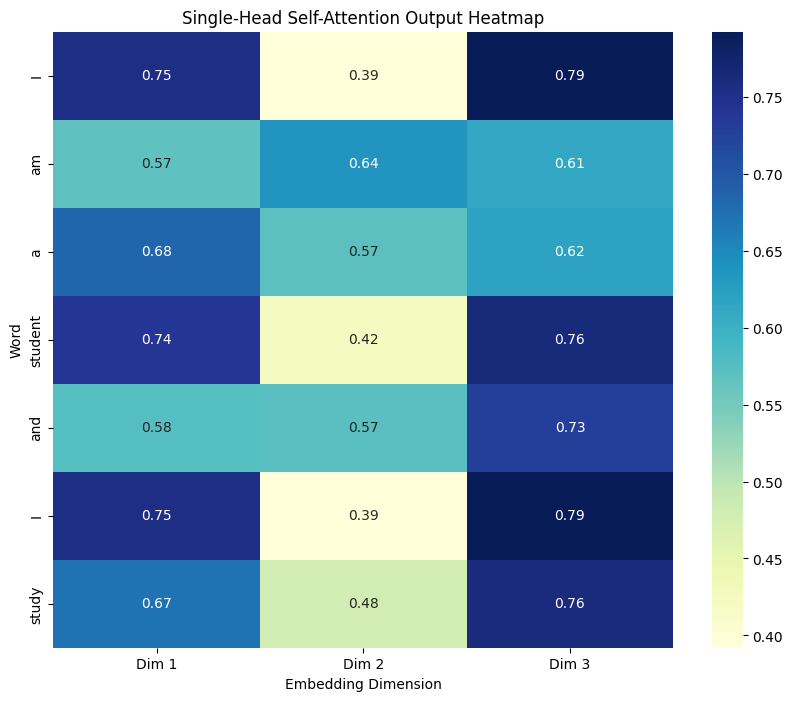

Words in the sentence: ['I', 'am', 'a', 'student', 'and', 'I', 'study']
Self-Attention output:
 [[0.75361687 0.39202225 0.79230016]
 [0.56841594 0.63623595 0.6136    ]
 [0.683693   0.5700855  0.6196987 ]
 [0.73924845 0.42442176 0.76363075]
 [0.57507956 0.57277703 0.7289295 ]
 [0.75361687 0.39202225 0.79230016]
 [0.67041796 0.4795588  0.760267  ]]


In [11]:
# Visualize output as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(output, xticklabels=['Dim 1', 'Dim 2', 'Dim 3'], yticklabels=sentence, annot=True, cmap="YlGnBu")
plt.title("Single-Head Self-Attention Output Heatmap")
plt.xlabel("Embedding Dimension")
plt.ylabel("Word")
plt.show()

print("Words in the sentence:", sentence)
print("Self-Attention output:\n", output)

멀티헤드 어텐션도 살펴봅시다

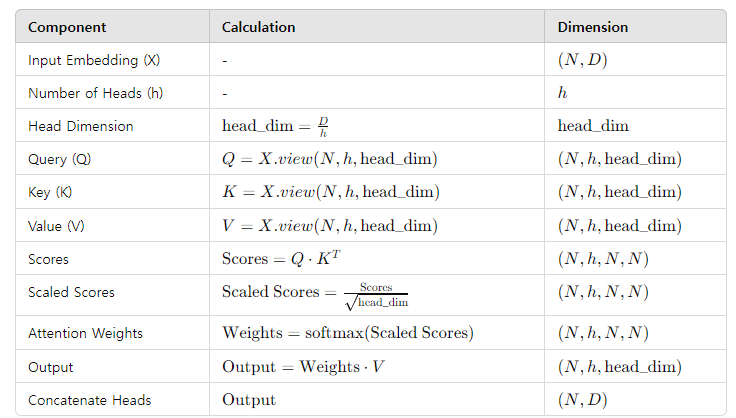

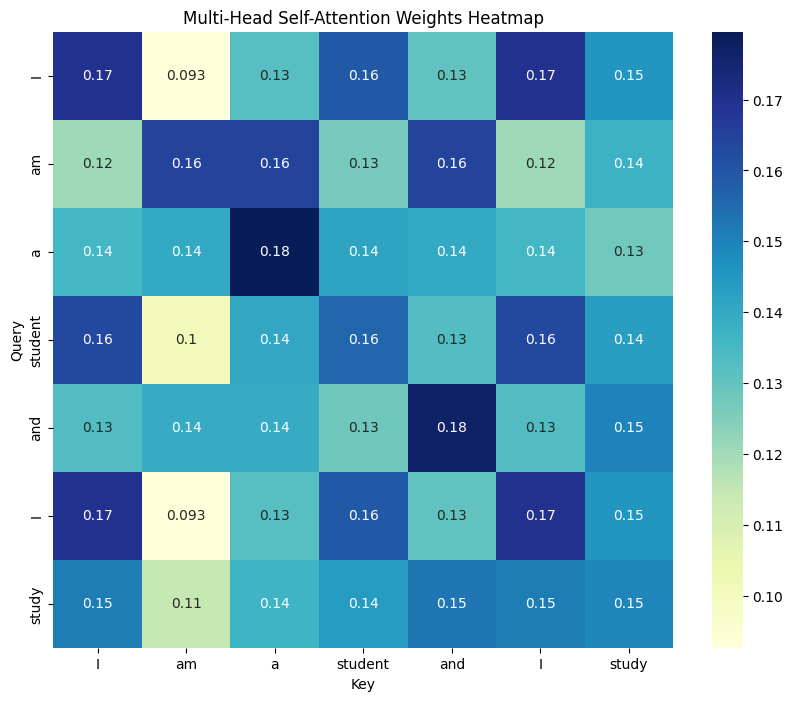

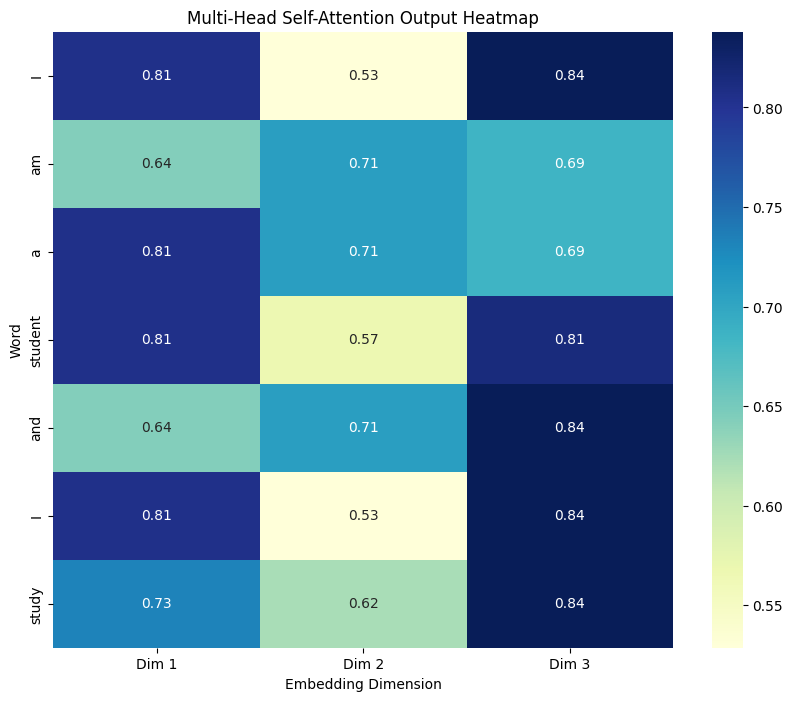

Words in the sentence: ['I', 'am', 'a', 'student', 'and', 'I', 'study']
Multi-Head Self-Attention output:
 [[0.80550957 0.5285715  0.838058  ]
 [0.6428572  0.7081388  0.6857143 ]
 [0.80550957 0.7081388  0.6857143 ]
 [0.80550957 0.5665618  0.8140978 ]
 [0.6428572  0.7081388  0.838058  ]
 [0.80550957 0.5285715  0.838058  ]
 [0.7325603  0.6222803  0.838058  ]]


In [14]:
import numpy as np
import torch
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt

def multi_head_self_attention(X, num_heads):
    N, D = X.shape
    head_dim = D // num_heads

    assert D % num_heads == 0, "Embedding dimension must be divisible by the number of heads"

    # Convert numpy array to torch tensor
    X = torch.tensor(X, dtype=torch.float32)

    # Linear projections for Query, Key, and Value for each head
    Q = X.view(N, num_heads, head_dim).permute(1, 0, 2)  # (num_heads, N, head_dim)
    K = X.view(N, num_heads, head_dim).permute(1, 0, 2)  # (num_heads, N, head_dim)
    V = X.view(N, num_heads, head_dim).permute(1, 0, 2)  # (num_heads, N, head_dim)

    # Step 1: Dot Products of the Query with all Keys
    # Using einsum to compute the dot products for each head efficiently
    scores = torch.einsum("hnd,hmd->hnm", Q, K)  # (num_heads, N, N)

    # Step 2: Scale
    scale = np.sqrt(head_dim)
    scores = scores / scale

    # Step 3: Softmax
    weights = F.softmax(scores, dim=-1)  # (num_heads, N, N)

    # Step 4: Weighted Sum
    # Using einsum to compute the weighted sum for each head efficiently
    output = torch.einsum("hnm,hmd->hnd", weights, V)  # (num_heads, N, head_dim)

    # Concatenate heads
    # The output shape is (num_heads, N, head_dim), we need to reshape it back to (N, D)
    output = output.permute(1, 0, 2).contiguous().view(N, D)

    return output.detach().numpy(), weights.detach().numpy()

# Example data (word embeddings for "I", "am", "a", "student", "and", "I", "study")
word_embeddings = {
    "I": [1, 0, 1],
    "am": [0, 1, 0],
    "a": [1, 1, 0],
    "student": [1, 0.2, 0.8],
    "and": [0, 1, 1],
    "study": [0.5, 0.5, 1]
}

# Convert words to embedding matrix
sentence = ["I", "am", "a", "student", "and", "I", "study"]
X = np.array([word_embeddings[word] for word in sentence])

num_heads = 3
output, weights = multi_head_self_attention(X, num_heads)

# Average the attention weights across heads for visualization
avg_weights = weights.mean(axis=0)

# Visualize weights as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(avg_weights, xticklabels=sentence, yticklabels=sentence, annot=True, cmap="YlGnBu")
plt.title("Multi-Head Self-Attention Weights Heatmap")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()

# Visualize output as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(output, xticklabels=['Dim 1', 'Dim 2', 'Dim 3'], yticklabels=sentence, annot=True, cmap="YlGnBu")
plt.title("Multi-Head Self-Attention Output Heatmap")
plt.xlabel("Embedding Dimension")
plt.ylabel("Word")
plt.show()

print("Words in the sentence:", sentence)
print("Multi-Head Self-Attention output:\n", output)
